In [51]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import cifar10


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)


(50000, 32, 32, 3)


In [52]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

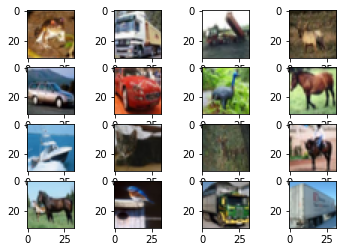

In [54]:
from matplotlib import pyplot
fig , axs = plt.subplots(4,4)
cnt = 0
for i in range(4):
     for j in range(4):
       axs[i, j].imshow(x_train[cnt], cmap='gray_r')
       cnt += 1

In [45]:
num_classes = len(np.unique(y_train))
print(num_classes)

10


In [46]:
from keras.utils import np_utils
import keras
# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


50000 train samples
10000 test samples


In [38]:
num_classes = len(np.unique(x_train))
print(num_classes)

256


In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((45000, 32, 32, 3), (10000, 32, 32, 3), (45000, 10), (10000, 10))

In [47]:
# let us first construct a basic mlp model, feel free to play around!
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 3072)              0         
                                                                 
 dense_28 (Dense)            (None, 1000)              3073000   
                                                                 
 dropout_20 (Dropout)        (None, 1000)              0         
                                                                 
 dense_29 (Dense)            (None, 512)               512512    
                                                                 
 dropout_21 (Dropout)        (None, 512)               0         
                                                                 
 dense_30 (Dense)            (None, 10)                5130      
                                                                 
Total params: 3,590,642
Trainable params: 3,590,642
N

In [48]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

In [49]:
model.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.9749 - accuracy: 0.2754
Epoch 2/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.8373 - accuracy: 0.3265
Epoch 3/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.7928 - accuracy: 0.3464
Epoch 4/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.7627 - accuracy: 0.3585
Epoch 5/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.7471 - accuracy: 0.3662
Epoch 6/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.7279 - accuracy: 0.3754
Epoch 7/20
1563/1563 [==============================] - 29s 19ms/step - loss: 1.7189 - accuracy: 0.3752
Epoch 8/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.7068 - accuracy: 0.3823
Epoch 9/20
1563/1563 [==============================] - 29s 19ms/step - loss: 1.7009 - accuracy: 0.3811
Epoch 10/20
1563/1563 [==============================] - 28s 18m

In [50]:
mlp_score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', mlp_score[1])


 Test accuracy: 0.4374000132083893
